In [1]:
# mouse volcano

In [336]:
import sys
import os
from itertools import chain
from collections import defaultdict
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('precision', 3)
import gseapy as gp
import goatools
import numpy as np
import seaborn as sns
from adjustText import adjust_text

sns.set_style('whitegrid')
obodag = goatools.obo_parser.GODag('go-basic.obo')
sys.path.insert(0, "/home/gstupp/projects/metaproteomics")
from metaproteomics import utils
#from metaproteomics.analysis import build_loci

BASE = '../out/'

load obo file go-basic.obo
go-basic.obo: fmt(1.2) rel(2017-03-16) 48,478 GO Terms


In [362]:
keep_names = {'rag_wt': ['Reg3b,Reg3g', 'Igha', 'Igkv8-27', 'Igj,Jchain', 'Ighg2c,Igh-3,Ighg2b', 'Igkc', 
                         'Pigr', '9530053a07rik,fcgbp', 'Amy2a1', 'Clca1', 'LAP3'],
             'rt_control': ['S100a8', 'S100a9', 'Reg2', 'Reg3a', 'Pzp,A2m', 'Reg1', 'Serpina3m,Serpina3k', 'Ltf', 
                            'MPO', 'H2-Ab1', 'Mug1,Mug2', 'Serpinc1', 'Serpina3n,Serpina3f', 'Gzma', 'Serping1',
                            'Reg3b,Reg3g', 'Serpina1a,serpina1d,serpina1c,serpina1e,serpina1b', 'Muc2', 
                            'Gm15299', 'Defa2,Defa7,Defa16,Defa13,Gm15299,Defa3,Defa8'],
               #'Amy2a1', 'Cpa1', 'Itln1,Itln1b', 'Clca1', 'Gpa33', 'Chil4,Chil3', 'Erap1'],
             'rt_wt': ['S100a8', 'S100a9', 'Reg2', 'Reg3a', 'Pzp,A2m', 'Reg1', 'Serpina3m,Serpina3k', 
                       'Ltf', 'MPO', 'H2-Ab1', 'Mug1,Mug2', 'Serpinc1', 'Serpina3n,Serpina3f', 'Gzma',
                       'Serping1', 'Reg3b,Reg3g', 'Serpina1a,serpina1d,serpina1c,serpina1e,serpina1b', 
                       'Muc2', 'Serpinb1a', 'Gm15299', 'Defa2,Defa7,Defa16,Defa13,Gm15299,Defa3,Defa8', 
                       'Igha', 'Igkv8-27', 'Igj,Jchain', 'Ighg2c,Igh-3,Ighg2b', 'Igkc', 'Pigr'],
              #'Amy2a1', 'Cpa1', 'Itln1,Itln1b', 'Clca1', 'Gpa33', 'Lap3', 'Chil4,Chil3', 'Erap1'],
             'rt_rag': ['S100a8', 'S100a9', 'Reg2', 'Reg3a', 'Pzp,A2m', 'Reg1', 'Serpina3m,Serpina3k',
                        'Ltf', 'MPO', 'H2-Ab1', 'Mug1,Mug2', 'Serpinc1', 'Serpina3n,Serpina3f', 'Gzma', 
                        'Serping1', 'Reg3b,Reg3g', 'Serpina1a,serpina1d,serpina1c,serpina1e,serpina1b',
                        'Muc2', 'Gm15299', 'Defa2,Defa7,Defa16,Defa13,Gm15299,Defa3,Defa8'] 
              #'Fcgbp', 'Cpa1', 'Itln1,Itln1b', 'Clca1', 'Chil4,Chil3', 'Erap1']
             }
                       
keep_names = {k:[x.upper() for x in v] for k,v in keep_names.items()}
keep_names = {k:[','.join(sorted(k.split(","))) for k in v] for k,v in keep_names.items()}
print(keep_names)

{'rt_wt': ['S100A8', 'S100A9', 'REG2', 'REG3A', 'A2M,PZP', 'REG1', 'SERPINA3K,SERPINA3M', 'LTF', 'MPO', 'H2-AB1', 'MUG1,MUG2', 'SERPINC1', 'SERPINA3F,SERPINA3N', 'GZMA', 'SERPING1', 'REG3B,REG3G', 'SERPINA1A,SERPINA1B,SERPINA1C,SERPINA1D,SERPINA1E', 'MUC2', 'SERPINB1A', 'GM15299', 'DEFA13,DEFA16,DEFA2,DEFA3,DEFA7,DEFA8,GM15299', 'IGHA', 'IGKV8-27', 'IGJ,JCHAIN', 'IGH-3,IGHG2B,IGHG2C', 'IGKC', 'PIGR'], 'rt_control': ['S100A8', 'S100A9', 'REG2', 'REG3A', 'A2M,PZP', 'REG1', 'SERPINA3K,SERPINA3M', 'LTF', 'MPO', 'H2-AB1', 'MUG1,MUG2', 'SERPINC1', 'SERPINA3F,SERPINA3N', 'GZMA', 'SERPING1', 'REG3B,REG3G', 'SERPINA1A,SERPINA1B,SERPINA1C,SERPINA1D,SERPINA1E', 'MUC2', 'GM15299', 'DEFA13,DEFA16,DEFA2,DEFA3,DEFA7,DEFA8,GM15299'], 'rag_wt': ['REG3B,REG3G', 'IGHA', 'IGKV8-27', 'IGJ,JCHAIN', 'IGH-3,IGHG2B,IGHG2C', 'IGKC', 'PIGR', '9530053A07RIK,FCGBP', 'AMY2A1', 'CLCA1', 'LAP3'], 'rt_rag': ['S100A8', 'S100A9', 'REG2', 'REG3A', 'A2M,PZP', 'REG1', 'SERPINA3K,SERPINA3M', 'LTF', 'MPO', 'H2-AB1', 'MUG1,MU

In [363]:
rename = {'Serpina3k,Serpina3m': 'Serpina3m,a3k',
         'Mug2,Mug1': 'Mug1,2',
         'Serpina3n,Serpina3f': 'Serpina3n,a3f',
         'Reg3g,Reg3b': 'Reg3b,3g',
         'Serpina1a,serpina1d,serpina1c,serpina1e,serpina1b': 'Serpina1a-e',
         'Gm15299': 'Defa27',
         'defa2,gm15299,defa8,defa7,defa13,defa16,defa3': 'Defa2',
         'Igj,Jchain': 'IgJ',
         'Ighg2c,Igh-3,Ighg2b': 'Igh-3',
         'Itln1,Itln1b': 'Itln1',
         'Chil4,Chil3': 'Chil3,4',
         '9530053a07rik,fcgbp': 'FCGBP'}
rename = {k.upper():v.upper() for k,v in rename.items()}
rename = {','.join(sorted(k.split(","))):v for k,v in rename.items()}
rename

{'9530053A07RIK,FCGBP': 'FCGBP',
 'CHIL3,CHIL4': 'CHIL3,4',
 'DEFA13,DEFA16,DEFA2,DEFA3,DEFA7,DEFA8,GM15299': 'DEFA2',
 'GM15299': 'DEFA27',
 'IGH-3,IGHG2B,IGHG2C': 'IGH-3',
 'IGJ,JCHAIN': 'IGJ',
 'ITLN1,ITLN1B': 'ITLN1',
 'MUG1,MUG2': 'MUG1,2',
 'REG3B,REG3G': 'REG3B,3G',
 'SERPINA1A,SERPINA1B,SERPINA1C,SERPINA1D,SERPINA1E': 'SERPINA1A-E',
 'SERPINA3F,SERPINA3N': 'SERPINA3N,A3F',
 'SERPINA3K,SERPINA3M': 'SERPINA3M,A3K'}

In [394]:
def plot(df_sig, df_insig, plot_name):
    fig = plt.figure(figsize=(15, 9))
    fig.set_tight_layout(False)
    ax = fig.add_subplot(111)

    # Plot the INsig points
    X = df_insig['log2FoldChange'].values
    Y = df_insig['-logp'].values
    ax.scatter(X, Y, color='silver', s=20)

    # Plot the sig points
    X = df_sig['log2FoldChange'].values
    Y = df_sig['-logp'].values
    ax.scatter(X, Y, color='black', s=20)

    texts = []
    X = df_sig['log2FoldChange'].values
    Y = df_sig['-logp'].values
    plotted_names = set()
    for name, x, y in zip(df_sig['gn'], X, Y):
        if not isinstance(name, str):
            continue
        name = ','.join(sorted(name.split(",")))
        if name.upper() in keep_names[plot_name]:
            name = rename[name.upper()] if name.upper() in rename else name
            texts.append(plt.text(x, y, name.upper(), size = 12, weight='extra bold'))
            plotted_names.add(name.upper())
        #elif abs(x) >= 1.5 and y >= 5 and name != '' and len(name)<10:
        #    texts.append(plt.text(x, y, name.upper(), size = 12, weight='extra bold'))
        #    plotted_names.add(name.upper())
            
    ax.xaxis.set_label_text("Log(2) Fold Change")
    ax.yaxis.set_label_text("-logp")
    ax.set_xlim(-10.5,10.5)
    ax.set_ylim(0,50)
    #ax.legend(loc=2, fontsize='x-large')
    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
    fig.savefig(plot_name + "_mouse_volcano.pdf")
    return plotted_names

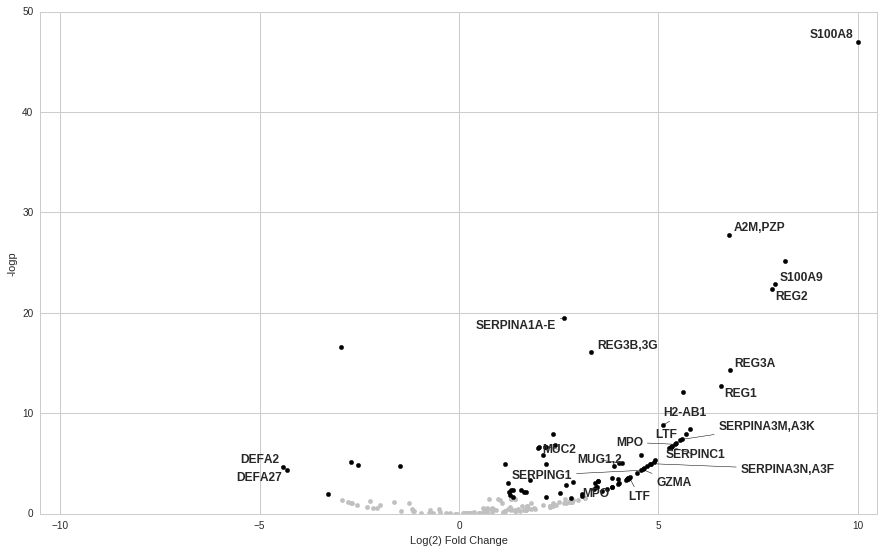

In [395]:
pt = 'rt_control'
df = pd.read_csv(os.path.join(BASE,"RT_control_results_named_annot.csv"), index_col=0)
df = df[df.human_mouse]
df.gn = df.gn.apply(fix_dupe_names)
df['-logp'] = -1*np.log(df.padj)
df_sig = df[(df.padj<=0.2) & (abs(df.log2FoldChange) >= 1)]
df_insig = df[~((df.padj<=0.2) & (abs(df.log2FoldChange) >= 1))]
plotted_names = plot(df_sig, df_insig, pt)

In [396]:
wanted_names = keep_names[pt]
wanted_names = [rename[name] if name in rename else name for name in wanted_names]
set(wanted_names) - set(plotted_names)

set()

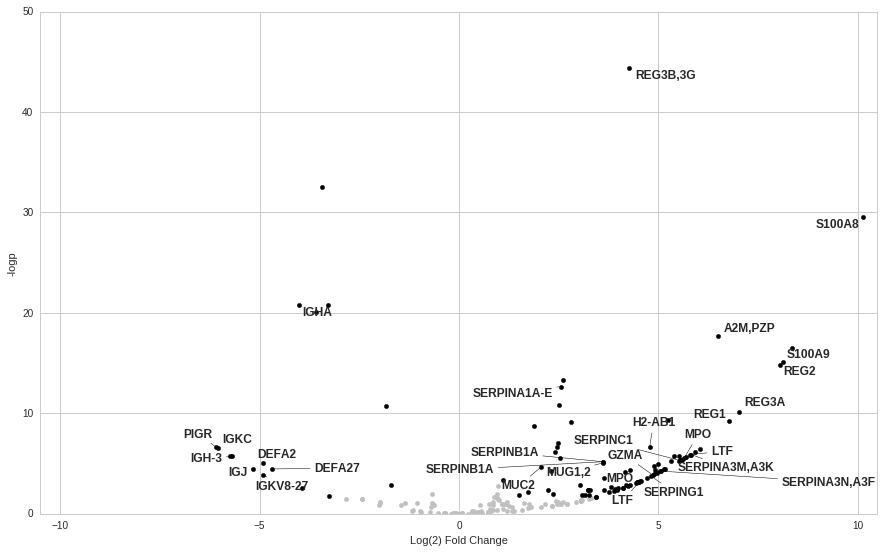

In [397]:
pt = 'rt_wt'
df = pd.read_csv(os.path.join(BASE,"RT_WT_results_named_annot.csv"), index_col=0)
df = df[df.human_mouse]
df.gn = df.gn.apply(fix_dupe_names)
df['-logp'] = -1*np.log(df.padj)
df_sig = df[(df.padj<=0.2) & (abs(df.log2FoldChange) >= 1)]
df_insig = df[~((df.padj<=0.2) & (abs(df.log2FoldChange) >= 1))]
plotted_names=plot(df_sig, df_insig, pt)

In [398]:
wanted_names = keep_names[pt]
wanted_names = [rename[name] if name in rename else name for name in wanted_names]
set(wanted_names) - set(plotted_names)

set()

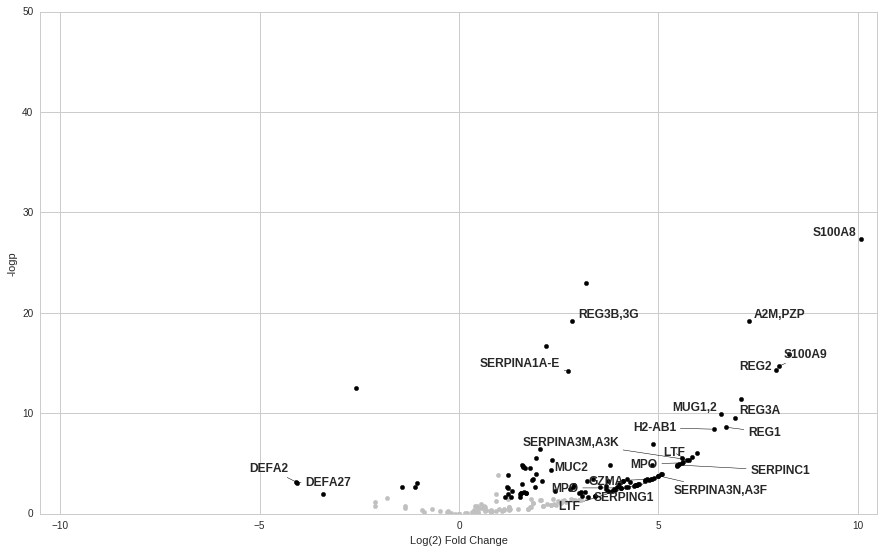

In [399]:
pt = 'rt_rag'
df = pd.read_csv(os.path.join(BASE,"RT_Rag_results_named_annot.csv"), index_col=0)
df = df[df.human_mouse]
df.gn = df.gn.apply(fix_dupe_names)
df['-logp'] = -1*np.log(df.padj)
df_sig = df[(df.padj<=0.2) & (abs(df.log2FoldChange) >= 1)]
df_insig = df[~((df.padj<=0.2) & (abs(df.log2FoldChange) >= 1))]
plotted_names=plot(df_sig, df_insig, pt)

In [400]:
wanted_names = keep_names[pt]
wanted_names = [rename[name] if name in rename else name for name in wanted_names]
set(wanted_names) - set(plotted_names)

set()

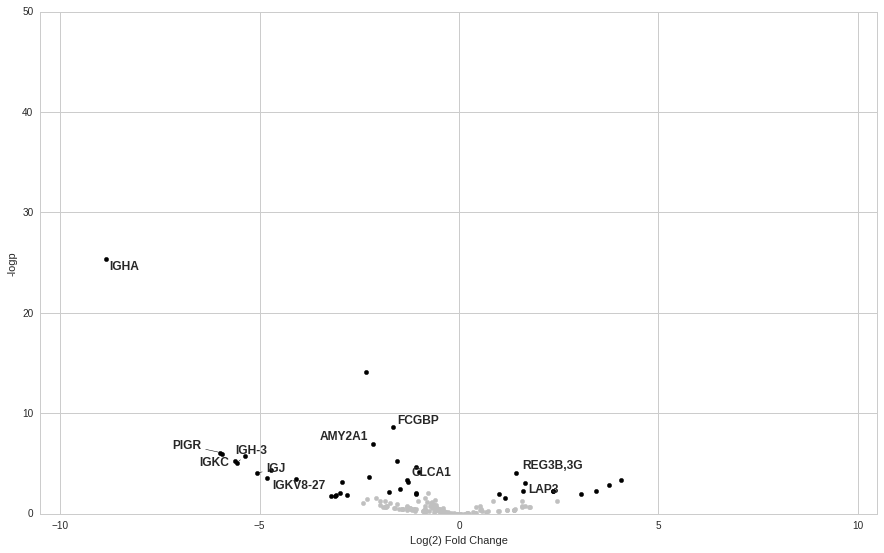

In [401]:
pt = 'rag_wt'
df = pd.read_csv(os.path.join(BASE,"Rag_WT_results_named_annot.csv"), index_col=0)
df = df[df.human_mouse]
df.gn = df.gn.apply(fix_dupe_names)
df['-logp'] = -1*np.log(df.padj)
df_sig = df[(df.padj<=0.2) & (abs(df.log2FoldChange) >= 1)]
df_insig = df[~((df.padj<=0.2) & (abs(df.log2FoldChange) >= 1))]
plotted_names=plot(df_sig, df_insig, pt)

In [402]:
wanted_names = keep_names[pt]
wanted_names = [rename[name] if name in rename else name for name in wanted_names]
set(wanted_names) - set(plotted_names)

set()

In [403]:
df[df.gn.str.upper().str.count("FCGBP")>0]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gn,gn1,human_mouse,lca,name,go,go_name,-logp
165662997,220.286,-1.661,0.341,-4.875,1.089e-06,1.796e-04,"9530053a07rik,fcgbp",NaN,True,mus musculus,tr|E9Q0B5|E9Q0B5_MOUSE Protein Fcgbp OS=Mus mu...,GO:0005515,protein binding,8.625
